<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/01_7_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A2(Ada_Boost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [ ]:
import warnings
warnings.filterwarnings('ignore')

앙상블 학습의 대표 유형인 Boosting과 Bagging을 비교분석해보자.

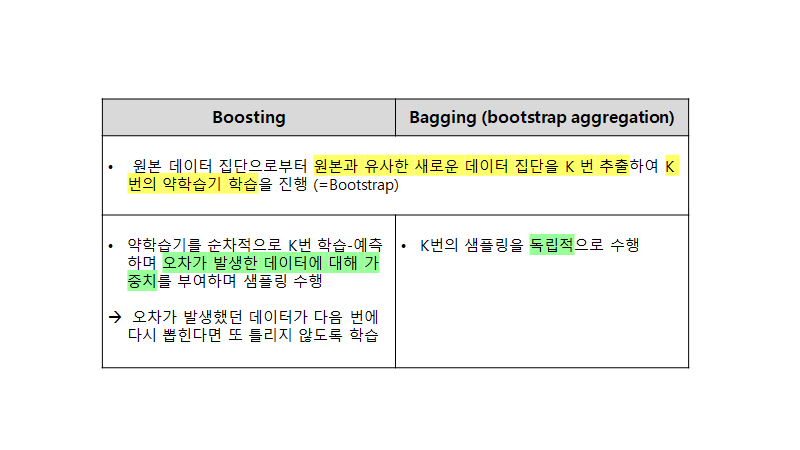

# Ada Boost

`AdaBoost(Adaptive Boosting)`
*  Decision Tree 의 Boosting 모델 중 가장 표준이 되는 모델
*  Boosting 계열 Decision Tree에는 AdaBoost 외에도 MadaBoost , LogitBoost 등이 있음. 이들은 Cost 를 계산하는 방식에 차이가 있음.
*  AdaBoost 는 Cost를 지수 손실로 계산

작동 과정

1. 학습 데이터 N 개로부터 중복을 허용하여 무작위로 샘플 데이터 N 개를 추출한다.
2. 샘플 데이터에서 중복을 허용하지 않고 , 무작위로 X 값 (input feature) d 개를 선택한다.
3. d 개의 feature 에 대해 Decision Tree 를 수행한다.
4. **오차가 발생한 데이터가 샘플링할 때 더욱 잘 추출되도록 가중치를 부여한다.**      <-배깅 모델과의 차이점

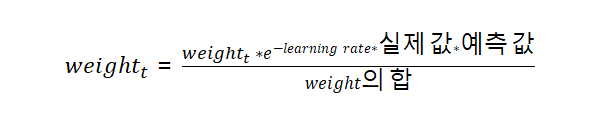

5. 위의 1 3 과정을 K 번 수행한다.
6. K개의 약한 학습기 각각에 가중치를 부여해 결합한다.

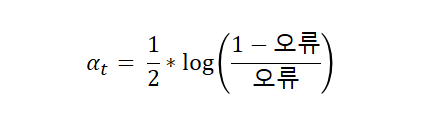

In [ ]:
# 라이브러리 import
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

## 1) Parameter 튜닝

### 1-1. 붓꽃 데이터 생성

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

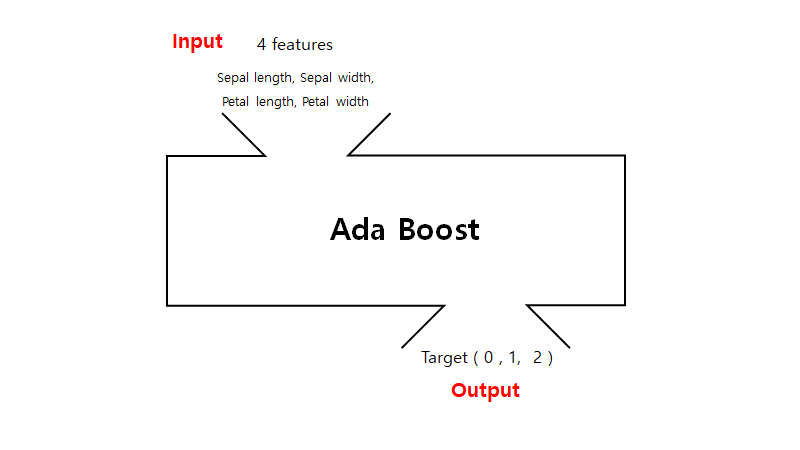

In [ ]:
# iris data를 불러온 후, iris 변수에 담아보자.
iris = load_iris()

# iris data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True)
# 시각화를 위해서 특성을 2개만 사용하였다. --> iris.data[:, :2]

### 1-2. Ada Boost Classifier 생성 





`AdaBoostClassifier(base_estimator, n_estimators, learning_rate, algorithm, random_state)`

주요 parameter:
  - `base_estimator` : 모델을 정해주는 파라미터, (기본 값= DecisionTreeClassifier(max_depth=1)) 
  - `n_estimators` : 앙상블의 약한 학습기 개수, (기본 값=50)
  - `learning_rate` : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정, learning rate가 클수록 보정을 강하게 함, (기본값=1.0)
  - `algorithm` : SAMME과 SAMME.R 중에서 선택 가능, (기본 값=SAMME.R),  
  SAMME.R은 예측값이 아닌 클래스 확률값에 기반하므로 base_estimator가 클래스 확률 계산을 지원하는 경우에 사용이 가능함, SAMME으로 설정할 경우에 학습기를 업데이트 할 때 클래스 예측으로 에러를 계산하고, SAMME.R으로 설정할 경우에 클래스 예측 확률로 에러를 계산함. SAMME.R 기반 모델이 SAMME 기반 모델 보다 수행속도가 더 빠르고, 에러가 더 적은 것으로 평가받고 있음. 

참고:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


참고: SAMME

- 사이킷런에서 제공하는 에이다 부스트는 SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)이라는 알고리즘으로 구현되어 있다.
- SAMME과 AdaBoost 알고리즘은 유사하나 t번째 모델의 가중치(=alpha) 계산법에 차이가 있다.
 * 클래스의 수가 2인(K=2) 이중 분류(binary classification)의 경우에는 SAMME는 AdaBoost와 동일한 알고리즘이 된다. 

SAMME에서의 t번째 모델 가중치 계산식

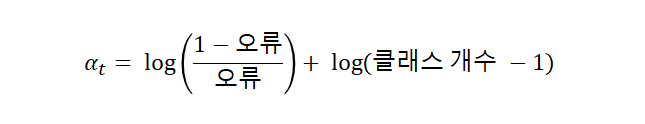

AdaBoost에서의 n번째 모델 가중치 계산식

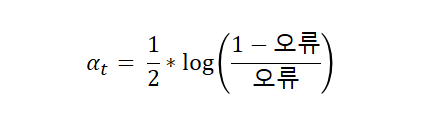

#### SAMME.R (real boosting algorithm)

In [ ]:
# algorithm=SAMME.R으로 설정된 Ada Boost classifier을 로드한 뒤 학습시켜보자.
model_ada = AdaBoostClassifier(n_estimators=9, algorithm='SAMME.R',
                              learning_rate=0.5).fit(X_train, y_train)

In [ ]:
# AdaBoost의 개별 예측기 정보를 출력해보자. RandomForest와 마찬가지로 .estimators_에 예측기 정보가 저장되어 있다.

#앞서 n_estimators를 9개로 설정하였기 때문에 9개의 정보가 출력이 된다.
model_ada.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=951133886, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=469235161, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=No

In [ ]:
# 결정 경계를 시각화해보자.
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


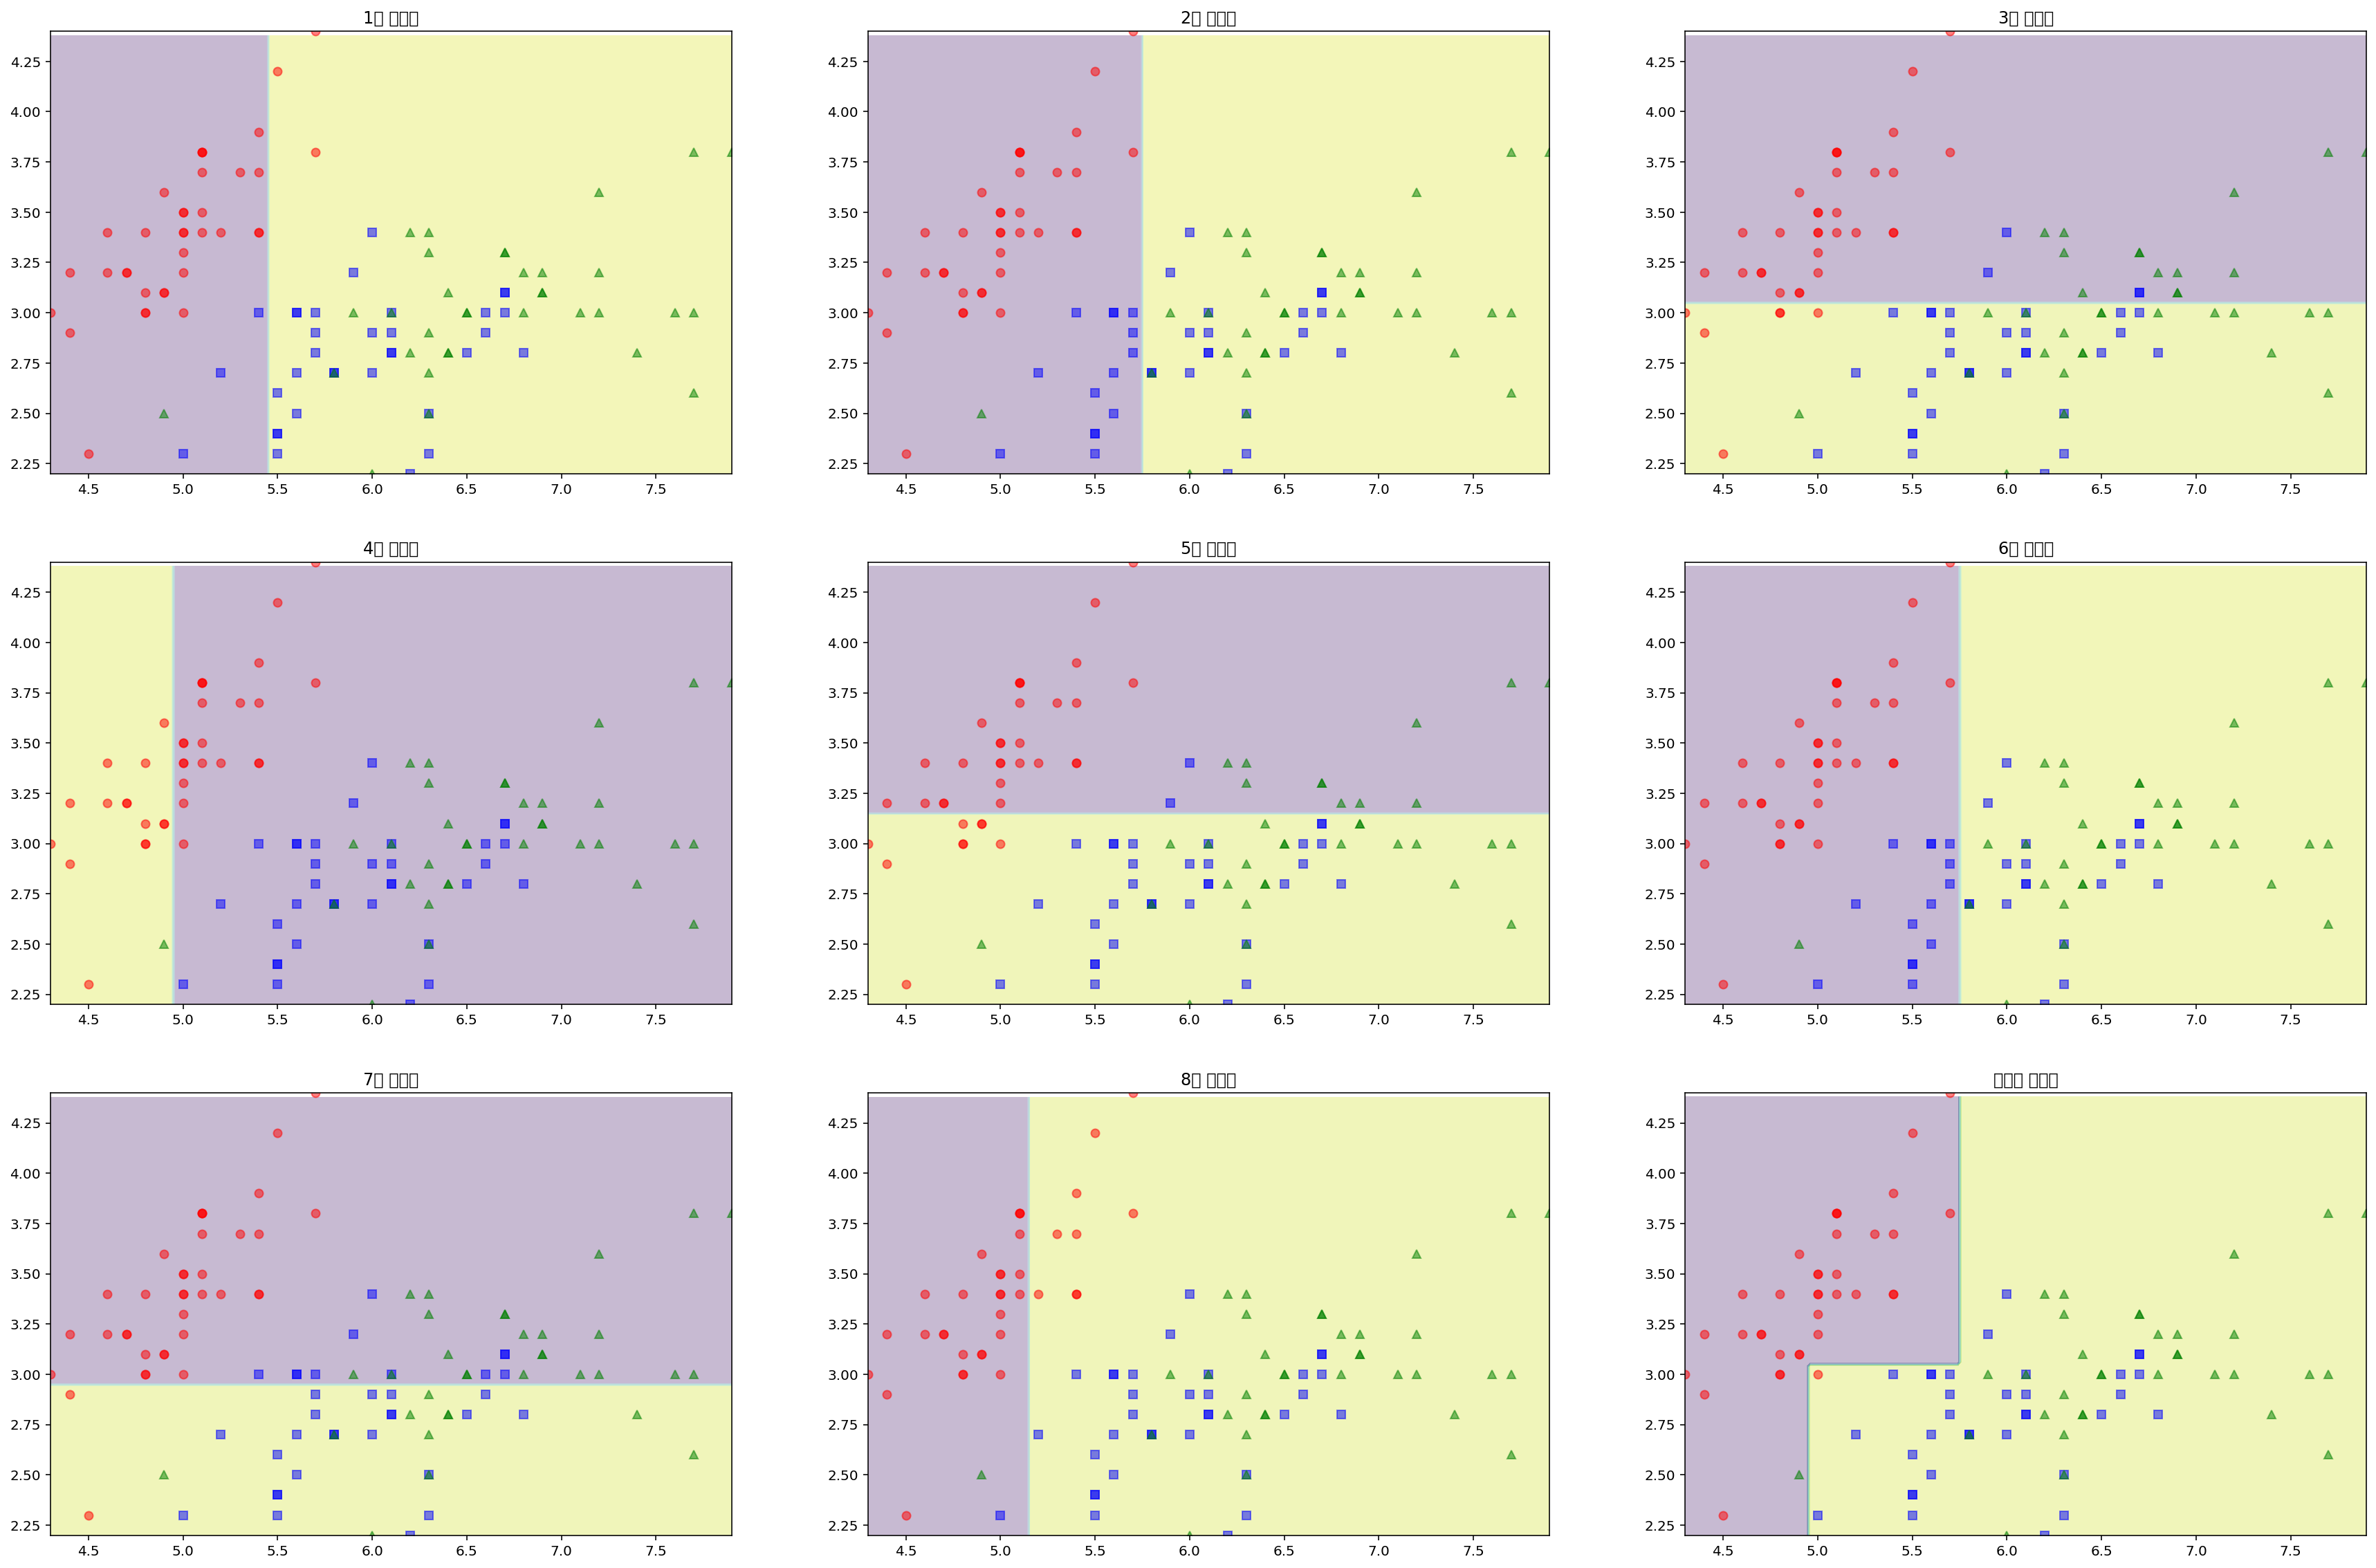

In [ ]:
# pyplot의 subplot 기능을 사용하여 여러 개(Ada Boost 모델과 이에 포함된 개별 학습기)의 그래프를 한 화면에 담아보자.
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

- 에이다 부스트는 깊이가 1인 결정트리를 사용한다. 깊이가 1이기 때문에 경계선이 하나만 표시 되어있다. 앙상블된 모델역시 경계선이 단순하게 그려져있다.

In [ ]:
# algorithm이 SAMME.R인 경우에는 predict_proba를 이용해 각 클래스의 확률을 알 수 있다.
model_ada.predict_proba(X_test)

array([[7.97547796e-04, 7.30054985e-01, 2.69147468e-01],
       [7.58053014e-05, 8.01122696e-01, 1.98801498e-01],
       [1.63552136e-04, 8.63845332e-01, 1.35991116e-01],
       [7.97547796e-04, 7.30054985e-01, 2.69147468e-01],
       [2.95388237e-01, 6.17514619e-01, 8.70971440e-02],
       [1.63552136e-04, 8.63845332e-01, 1.35991116e-01],
       [8.20334287e-01, 1.48540303e-01, 3.11254103e-02],
       [1.63552136e-04, 8.63845332e-01, 1.35991116e-01],
       [4.33074220e-04, 8.38235058e-01, 1.61331867e-01],
       [1.50861474e-01, 7.75735412e-01, 7.34031137e-02],
       [2.95388237e-01, 6.17514619e-01, 8.70971440e-02],
       [7.58053014e-05, 8.01122696e-01, 1.98801498e-01],
       [7.72336262e-01, 2.02626787e-01, 2.50369512e-02],
       [8.23926013e-01, 3.37897273e-04, 1.75736090e-01],
       [7.58053014e-05, 8.01122696e-01, 1.98801498e-01],
       [7.97547796e-04, 7.30054985e-01, 2.69147468e-01],
       [1.50861474e-01, 7.75735412e-01, 7.34031137e-02],
       [5.97533256e-01, 4.90318

In [ ]:
# 예측 결과와 클래스의 확률을 비교해보자.
model_ada.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0])

In [ ]:
# SAMME.R 기반 AdaBoost모델의 성능을 출력해보자.
print('SAMME.R의 train score : {}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train score : 0.6666666666666666
SAMME.R의 test score : 0.6


#### SAMME (discrete boosting algorithm)

In [ ]:
# algorithm=SAMME으로 설정된 Ada Boost classifier을 로드한 뒤 학습시켜보자.
ada_samme = AdaBoostClassifier(n_estimators=9, algorithm='SAMME',
                              learning_rate=0.5).fit(X_train, y_train)

In [ ]:
# AdaBoost의 개별 예측기 정보를 출력해보자. RandomForest와 마찬가지로 .estimators_에 예측기 정보가 저장되어 있다.

#앞서 n_estimators를 9개로 설정하였기 때문에 9개의 정보가 출력이 된다.
ada_samme.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1937191531, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1987557256, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=

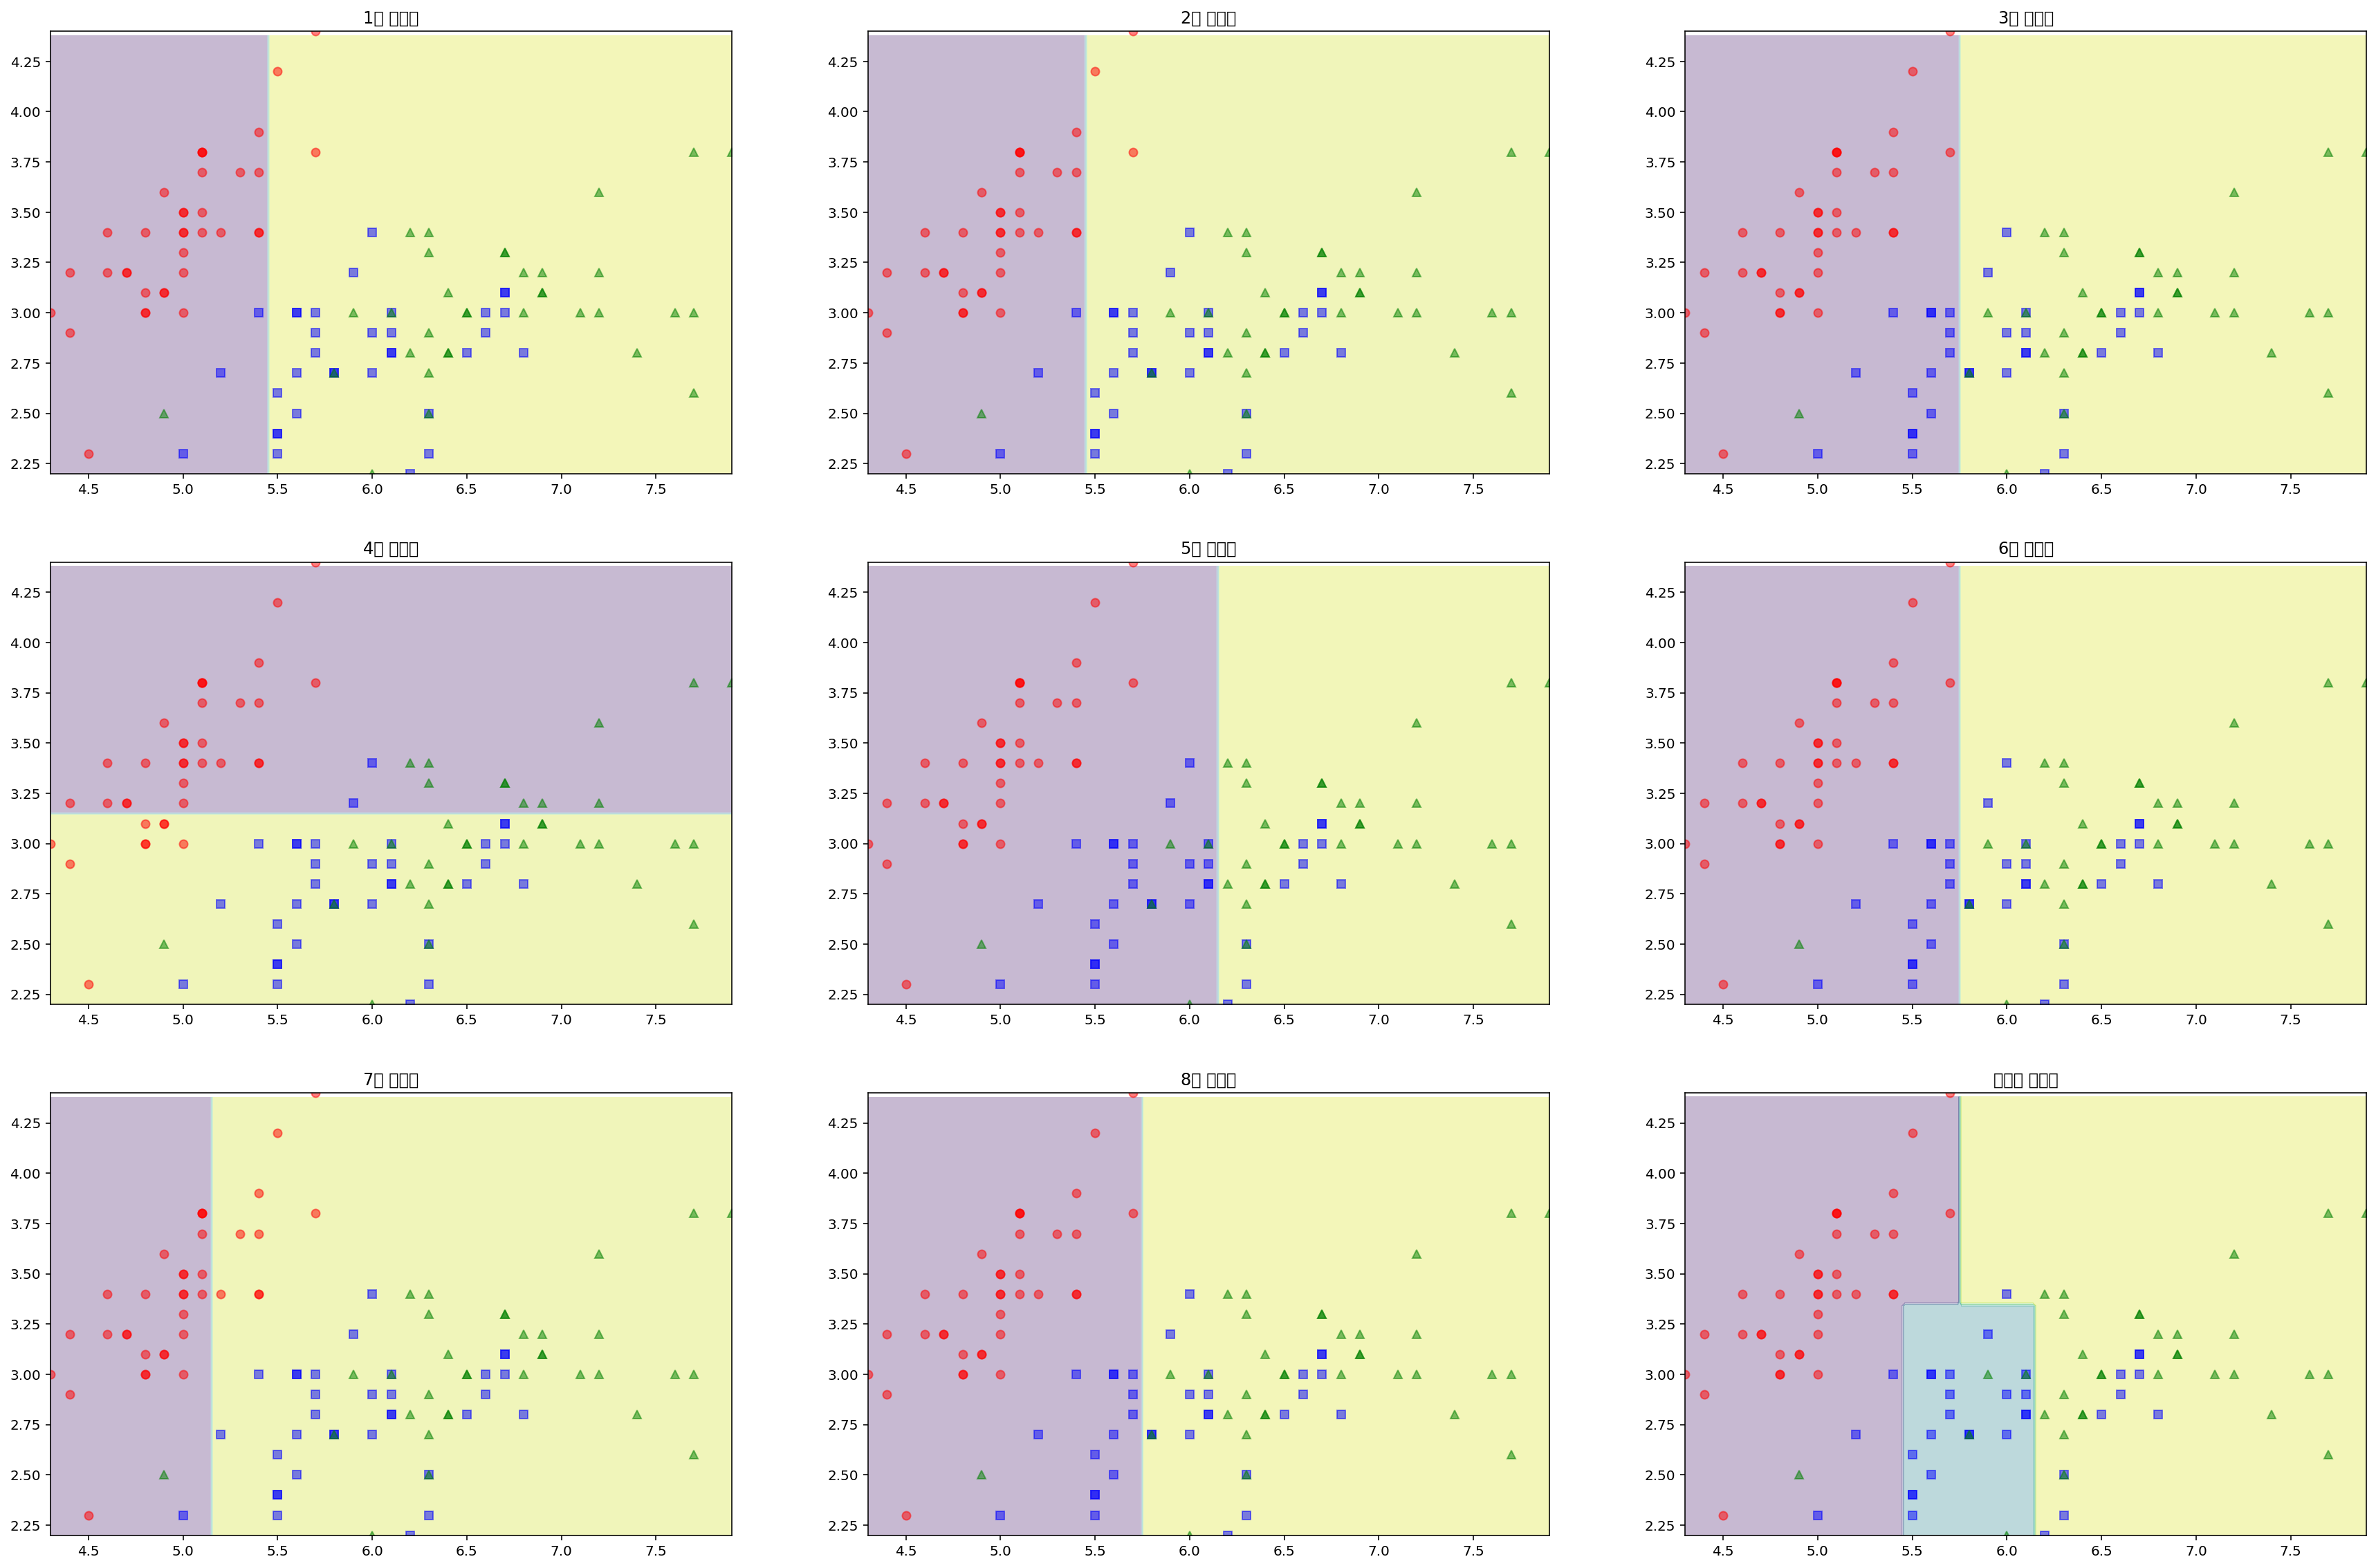

In [ ]:
# 결정 경계를 시각화해보자.
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(ada_samme.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(ada_samme.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(ada_samme.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(ada_samme.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(ada_samme.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(ada_samme.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(ada_samme.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(ada_samme.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(ada_samme, X_train, y_train)

In [ ]:
# SAMME 기반 AdaBoost모델의 성능을 출력해보자.
print('SAMME의 train score : {}'.format(ada_samme.score(X_train, y_train)))
print('SAMME의 train score : {}'.format(ada_samme.score(X_test, y_test)))

SAMME의 train score : 0.819047619047619
SAMME의 train score : 0.6444444444444445


### 1-3. 모델 검증

In [ ]:
# classification report를 만들어 두 모델의 성능을 비교해보자.
pred_r = ada_samme.predict(X_test)
pred_samme = model_ada.predict(X_test)

print('SAMME.R 분류 report:\n', classification_report(y_test, pred_r))
print('SAMME 분류 report:\n', classification_report(y_test, pred_samme))

SAMME.R 분류 report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.54      0.44      0.48        16
           2       0.59      0.62      0.61        16

    accuracy                           0.64        45
   macro avg       0.64      0.66      0.65        45
weighted avg       0.63      0.64      0.63        45

SAMME 분류 report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.47      0.94      0.62        16
           2       0.00      0.00      0.00        16

    accuracy                           0.60        45
   macro avg       0.46      0.62      0.52        45
weighted avg       0.43      0.60      0.49        45



- SAMME보다는 SAMME.R을 이용한 에이다부스트 모델이 성능이 더 높게 나오는 것을 확인할 수 있다.
- 특히, SAMME을 사용한 모델은 class 2를 거의 분류해내지 못한 것을 알 수 있다. (class=2: precision=0.20, recall=0.07, f1-score=0.11)

## 2) 특성 중요도

### 2-1. 유방암 데이터 생성

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

In [ ]:
# 유방암 데이터를 로드해보자.
cancer = load_breast_cancer()

# 유방암 데이터를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

### 2-2 모델 생성

AdaBoost 내에서의 특성 중요도를 RandomForest 모델과 비교하여 살펴보자. 

#### Ada Boost Classifier 

In [ ]:
# 50개의 약한 학습기를 가진 Ada Boost Classifier을 생성해보자.
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5).fit(X_train, y_train)

In [ ]:
#Ada Boost 모델의 30 features에 대한 중요도를 출력해보자.
ada.feature_importances_

array([0.  , 0.06, 0.  , 0.02, 0.04, 0.02, 0.  , 0.06, 0.06, 0.  , 0.08,
       0.02, 0.  , 0.04, 0.  , 0.06, 0.  , 0.04, 0.  , 0.06, 0.04, 0.06,
       0.08, 0.04, 0.08, 0.  , 0.1 , 0.04, 0.  , 0.  ])

#### Random Forest Classifier

In [ ]:
# 50개의 약한 학습기를 가진 Random Forest Classifier을 생성해보자.
randf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)

In [ ]:
#Random Forest 모델의 30 features에 대한 중요도를 출력해보자.
randf.feature_importances_

array([0.03282307, 0.01272618, 0.06712473, 0.06591737, 0.00532161,
       0.02400664, 0.06178088, 0.08628932, 0.00363606, 0.00321795,
       0.02734286, 0.00604273, 0.01568388, 0.05814826, 0.00365408,
       0.00291011, 0.00582702, 0.00425027, 0.00408545, 0.0039168 ,
       0.10282404, 0.0149371 , 0.07114545, 0.07950812, 0.00905184,
       0.01763497, 0.05284263, 0.13919282, 0.01034849, 0.00780925])

### 2-3 특성 중요도 시각화

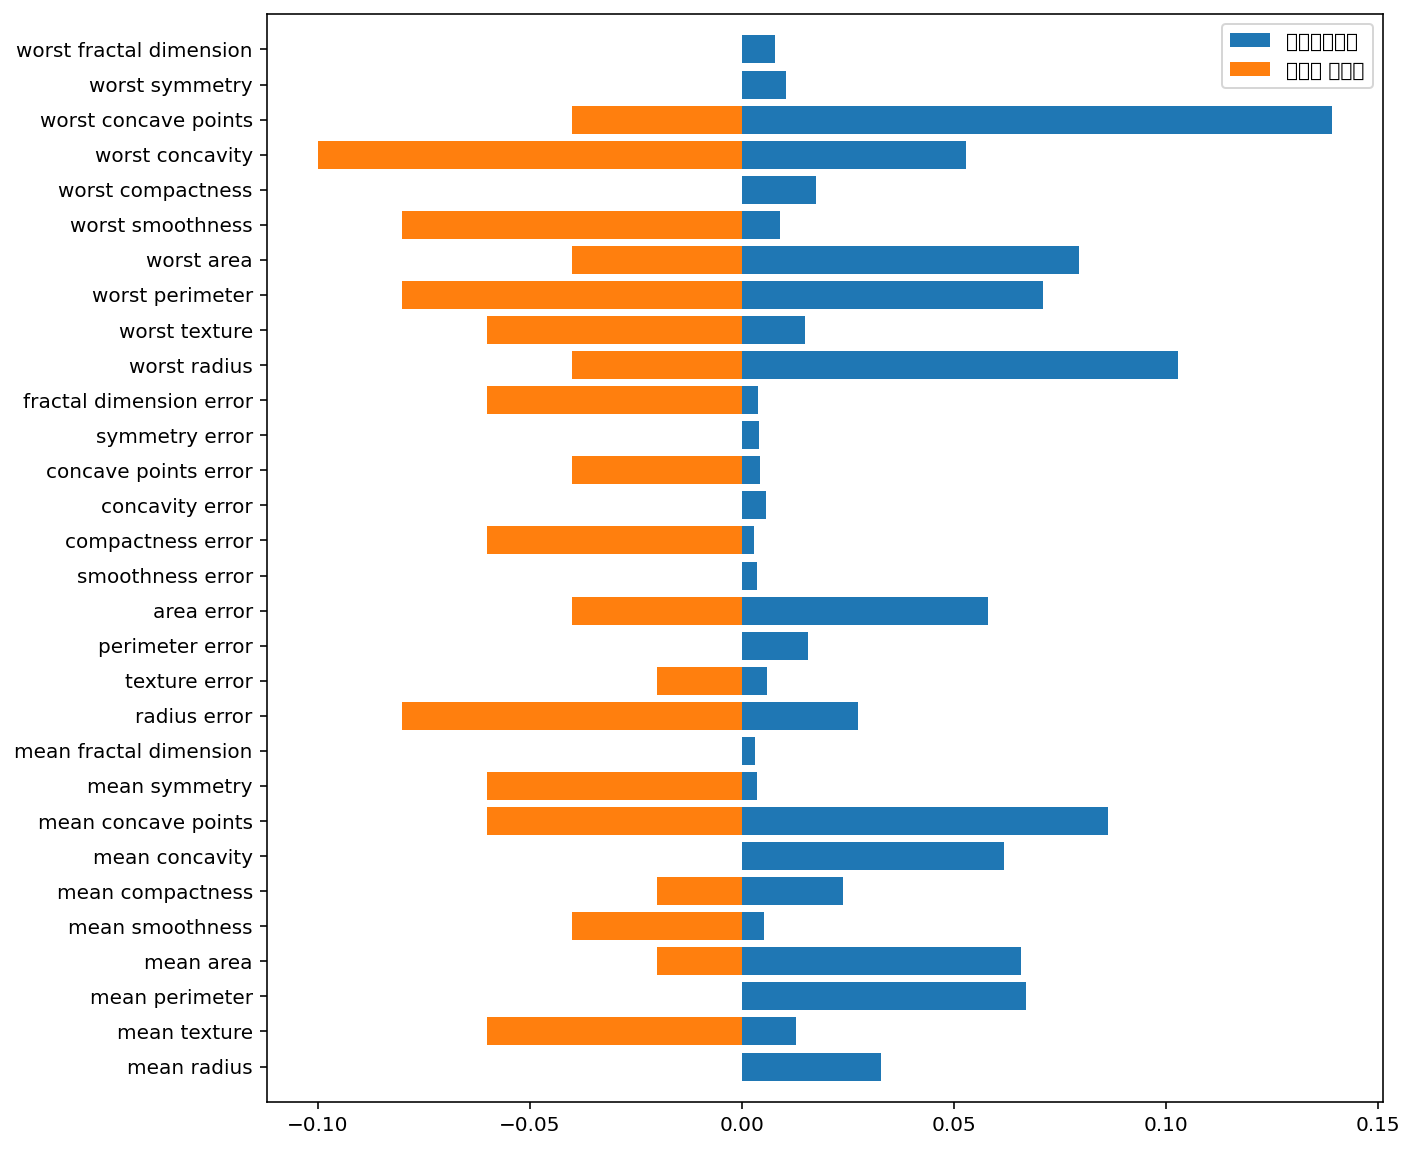

In [ ]:
# 앞서 출력한 features importance를 시각화해보자. 

plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = ada.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.legend(['Random Forest', 'Ada Boost'])
plt.show()

- 에이다 부스트와 랜덤포레스트의 특성 중요도를 비교해 보았다.  
- 0의 값을 가진 특성들도 있고 다른 모델에서는 중요하게 생각하지 않은 특성을 오히려 중요하게 보는 경우도 있다.

## 3) 심화 학습 (pseudocode)

    class Adaboost:
        학습 과정
        def fit(X, y):
            1) base 학습기를 생성하여 weight를 1/n으로 초기화시켜준다. (n=샘플의 개수)
            2) 약학습기를 생성한다.
            3) greedy search: 모든 feature과 모든 threshold를 탐색하여 에러를 최소화하는 최적의 feature과 threshold 값을 도출한다.
                3-1. polarity를 1로 설정하여 예측하여 본다,
                3-2. polarity가 1로 설정되어 있을 때 threshold보다 feature value가 작을 경우 클래스를 -1로 예측한다.
                3-3. 에러(=잘못 분류된 샘플의 weight의 합)을 계산한다.
                3-4. 에러가 0.5 보다 클 경우,
                    3-4.1 1에서 에러를 뺀 값으로 에러를 설정한다.
                    3-4.2 polarity를 -1로 설정한다.
                3-5. 새롭게 계산된 에러가 기존 에러보다 작을 경우, 현재 약학습기 구성(polarity, threshold, feature, 에러)를 저장한다. 
           4) alpha(=0.5 * (1-에러)/(에러))를 계산한다.
           5) 예측을 수행한다.
           6) weight을 업데이트 한다.(w = w * exp(-alpha * y * 예측 값 / weight의 합)
           7) 약학습기를 저장한다.
        
        예측 과정
        def predict(self, X):
           1) 저장된 모든 학습기에 대하여 예측을 수행한다.
           2) 예측치의 합을 구한다.
           3) 예측치의 합이 양의 수일 경우 +1을, 음의 수일 경우 -1을 return
        
        평가 과정
        def accuracy(y_true, y_pred):
           1) 정확도를 구한다.
                1-1. 오류(=실제값과 예측치의 차이)의 합을 구한다.
                1-2. 오류를 예측치의 개수로 나눈다.
           2) 정확도를 return           




In [ ]:
  
import numpy as np


# 약학습기 생성
class DecisionStump:
    def __init__(self):
        # 에러가 0.5보다 클 경우 decision을 뒤집고 에러를 1-에러로 설정한다. 이 때 polarity를 -1로 설정한다.
        # 기본 값은 1이다. 
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None
    # 0과 1사이의 오류에 대하여 알파 값(=약학습기의 가중치)를 계산하는 과정
    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        # polarity가 1으로 설정되어 있을 때 threshold보다 feature value가 작을 경우를 클래스를 -1으로 예측한다.
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        # polarity가 -1으로 설정되어 있는 경우 threshold보다 feature value가 클 때 클래스를 -1으로 예측한다.
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


class Adaboost:
    def __init__(self, n_clf=5): 
        self.n_clf = n_clf
        self.clfs = []
    # 학습 과정
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # 1) weight을 1/n로 초기화 시켜준다. (n=샘플의 개수)
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        # 4) 모든 약학습기에 대하여 1-3 과정을 반복
        for _ in range(self.n_clf):            
            # 2) 약학습기를 생성한다.
            clf = DecisionStump()
            min_error = float("inf")

            # 3) greedy search: 모든 feature과 모든 threshold를 탐색하여 에러를 최소화하는 최적의 feature과 threshold 값을 찾아낸다.
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # 3-1. polarity를 1로 설정하여 예측하여 본다. 
                    p = 1
                    predictions = np.ones(n_samples)
                    # 3-2. feature value가 threshold보다 작을 때 클래스를 -1로 분류한다.
                    # 3-3. 이 경우, feature value가 threshold보다 크거나 같을 때 클래스를 1(=default)로 분류한다.
                    predictions[X_column < threshold] = -1

                    # 3-4. 에러(=잘못 분류된 샘플의 weight의 합)을 계산한다.
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    # 3-5. 에러가 0.5 보다 클 경우, 
                        # 3-5.1 에러를 1에서 뺀 값으로 설정한다.
                        # 3-5.2 polarity를 -1로 설정한다.
                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # 3-6. 새롭게 계산된 에러가 기존 에러보다 작을 경우, 현재 약학습기 구성을 저장한다.
                        # 3-6.1 polarity를 업데이트한다.
                        # 3-6.2 threshold를 업데이트한다.
                        # 3-6.3 feature(변수)를 업데이트한다.
                        # 3-6.4 에러를 업데이트한다.
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # 5) alpha(=0.5 * (1-에러)/(에러러))를 계산한다.
            # 0으로 나누는 에러를 방지하기 위해 엡실론을 설정한다.
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # 6) 예측을 수행한다.
            predictions = clf.predict(X)

            # 7) weight을 업데이트 한다.(w = w * exp(-alpha * y * 예측 값 / weight의 합)
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)

            # 8) 약학습기를 저장한다.
            self.clfs.append(clf)

    # 예측 과정
    def predict(self, X):
        # 1) 저장된 모든 학습기에 대하여 예측을 수행한다.
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        # 2) 예측치의 합을 구한다.
        y_pred = np.sum(clf_preds, axis=0)
        # 3) 예측치의 합이 양의 수일 경우 +1을, 음의 수일 경우 -1을 return
        y_pred = np.sign(y_pred)

        return y_pred


# 평가 과정
if __name__ == "__main__":
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    #  1) 정확도를 구한다.
    def accuracy(y_true, y_pred):
        # 1-1. 오류(=실제값과 예측치의 차이)의 합을 구한다.
        # 1-2. 오류를 예측치의 개수로 나눈다.
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        # 2) 정확도를 return
        return accuracy

In [ ]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target


y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=5
)


# Adaboost classification with 5 weak classifiers

clf = Adaboost(n_clf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9736842105263158
